En el presente trabajo se busca demostrar los posibles usos que se les puede dar a las redes neuronales. Para esto utilizaremos dos modelos:
1. El primero, aprenderá a jugar al juego "piedra, papel o tijera".  
2. El segundo, aprenderá a identificar, a partir de una foto de una mano, si esta es una piedra, papel o tijera. 

Esto permitiría idealmente, concatenando los dos modelos, jugar contra la inteligecia artificial del primer modelo solamente con fotos de una mano.

En este notebook buscaremos implementar y mostrar el proceso mediante el cual una red neuronal aprende desde cero e iremos explicando y detallando paso a paso, por si alguien desea replicarlo.

## Modelo 1

En este modelo una red neuronal aprende desde cero a saber que elegir para ganar en el mítico juego de 
"piedra, papel o tijera".

### Inicio

Lo primero que haremos es definir las opciones posibles.

In [1]:
opciones = ["piedra", "tijera", "papel"]

Ademas, tendremos que definir una función, que apartir de 2 opciones nos diga quien gano, sea el jugador 1 o 2, o si se dio un empate.

In [2]:
def definir_ganador(opcion_j1, opcion_j2):
    if opcion_j1 == opcion_j2:
        return 0
    elif opcion_j1 == "piedra" and opcion_j2 == "tijera":
        return 1
    elif opcion_j1 == "tijera" and opcion_j2 == "papel":
        return 1
    elif opcion_j1 == "papel" and opcion_j2 == "piedra":
        return 1    
    elif opcion_j1 == "piedra" and opcion_j2 == "papel":
        return 2
    elif opcion_j1 == "tijera" and opcion_j2 == "piedra":
        return 2
    elif opcion_j1 == "papel" and opcion_j2 == "tijera":
        return 2

Esta será nuestra función de evaluación, la probamos un poquito para ver que hace lo que debería.

In [3]:
# Si ambos elijen papel deberia ser empate, por lo que -> devolver 0
aux = definir_ganador("papel", "papel");
print("El resultado fue =>", aux);
# Si el jugador 1 va con piedra y el 2 con papel, el jugador 2 deberia ser el ganador
aux = definir_ganador("piedra", "papel");
print("El resultado fue =>", aux);
# Si el jugador 2 va con piedra y el 1 con papel, ahora el ganador deberia ser el 1
aux = definir_ganador("papel", "piedra");
print("El resultado fue =>", aux);
# Si el jugador 1 va con tijera y el 2 con papel, el ganador deberia ser el jugador 1
aux = definir_ganador("tijera", "papel");
print("El resultado fue =>", aux);
# Si el jugador 1 va con tijera y el 2 con piedra, el ganador deberia ser el jugador 2
aux = definir_ganador("tijera", "piedra");
print("El resultado fue =>", aux);

El resultado fue => 0
El resultado fue => 2
El resultado fue => 1
El resultado fue => 1
El resultado fue => 2


Bueno ya tenemos la función que define ganadores, ahora deberíamos crearnos una función que juegue por nosotros para que juegue contra la red neuronal y esta pueda aprender, no lo hacemos manualmente porque requiere mucha iteracciones.

In [4]:
#Importamos random para al invocar la funcion Opcion_random nos devuelva alguna de las opciones válidas.
import random
random.seed("random_seed")
def opcion_random():
    return random.choice(opciones)

In [5]:
#La probamos a ver que tal
aux = opcion_random();
print("La opcion es =>", aux);
aux = opcion_random();
print("La opcion es =>", aux);
aux = opcion_random();
print("La opcion es =>", aux);
aux = opcion_random();
print("La opcion es =>", aux);
aux = opcion_random();
print("La opcion es =>", aux);

La opcion es => tijera
La opcion es => piedra
La opcion es => tijera
La opcion es => tijera
La opcion es => papel


Bien, ya tenemos casi todos los preparativos listos, nos falta una cosa más.
Para simplificarle la vida a la red neuronal, vamos a convertir los strings en listas de 1 y 0 porque las redes trabajan mejor con números.

In [6]:
#Traducimos el string a una lista de 0 y 1
#String to Neural net
def string_to_nn(opcion):
    if opcion=="piedra":
        return [1,0,0]
    elif opcion=="tijera":
        return [0,1,0]
    elif opcion=="papel":
        return [0,0,1]
#Si esto esta en otro orden le cuesta un monton o incluso nunca termina de aprender la red.

## Red neuronal


Importamos el MLPClassifer o Multi-layer Perceptron Classifier que es una biblioteca para machine learning de Python, que es lo que vamos a usar para entrenar la red.

In [7]:
from sklearn.neural_network import MLPClassifier

Tambien vamos a que definir el modelo, para esto definimos dos conjuntos de datos:
1. El primero que contiene las entradas.  
2. El segundo que contiene las salidas esperadas.  

Para construirlos vamos a usar la función que definimos antes para transformar los strings en listas.

In [8]:
modelo = MLPClassifier(warm_start=True)

In [9]:
data_X = list(map(string_to_nn, ["piedra", "tijera", "papel"])) #Ante esta entrada
data_y = list(map(string_to_nn, ["papel", "piedra", "tijera"])) #Quiero esta respuesta

#Muestro como me quedaron los sets
print(data_X)
print(data_y)

[[1, 0, 0], [0, 1, 0], [0, 0, 1]]
[[0, 0, 1], [1, 0, 0], [0, 1, 0]]


Ya creados los sets, los usamos para a entrenar el modelo

In [10]:
# A la red solo le enseño una solución por ahora, 
# le digo si te juegan "piedra" vos tenes que jugar "papel",
# y le hago aprender esto
modelo_entrenado = modelo.fit([data_X[0]], [data_y[0]])

/opt/conda/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Ahora la red ya conoce un movimiento ganador, entonces la vamos a ayudar a que aprenda los movimientos necesarios para ganarle a las otras 2 posibles jugadas. Esto lo vamos a hacer a traves de una función donde la red jugará contra nuestro jugador random.

**Aclaración**  
Al ser una red neuronal sencilla, estamos haciendo una trampita: el algoritmo siempre va a saber cual es la opción elegida por el player1 y actúa en consecuencia. Esto se diferencia de la vida real donde no se sabe, pero al ser un ejemplo de prueba le damos esa pequeña ventaja a la máquina.

In [11]:
def opcion_red_neuronal(prediccion):
  #Si vemos que la red neuronal tiene una certeza igual o mayor al 90% sobre su predicción, la tomamos como cierta, sino generamos una random.
  #El 90% no es arbitrario, probamos con valores entre 50% a 95%, y con 90% obtuvimos los mejores resultados
        if prediccion[0] >= 0.90:
            return opciones[0]
        elif prediccion[1] >= 0.90:
            return opciones[1]
        elif prediccion[2] >= 0.90:
            return opciones[2]
        else:
            return opcion_random()         

In [12]:
def aprendiendo(iteraciones):
    score = {"gano": 0, "perdio": 0}
    data_X = []
    data_y = []
    
    for i in range(iteraciones):
        jugador_random = opcion_random()
        prediccion = modelo_entrenado.predict_proba([string_to_nn(jugador_random)])[0]
        opcion_red = opcion_red_neuronal(prediccion)
        
        ganador = definir_ganador(jugador_random, opcion_red)
        
        if ganador==2: #Si gana la red, agrego a los sets como solucion buscada
            data_X.append(string_to_nn(jugador_random))
            data_y.append(string_to_nn(opcion_red))
            score["gano"]+=1
        else:  #Si pierde, sumo puntos a que perdio y no hago mas nada
            score["perdio"]+=1
        
    return score, data_X, data_y #Devuelvo los score, y los sets que puedan tener una nueva solucion valida para re-entrenar la red

In [13]:
registro = []
contador = 0
while True:
    contador+=1
    score, data_X, data_y = aprendiendo(1000) #Lo mandamos a jugar por iteraciones iteraciones
    
    porcentage = (score["gano"]*100/(score["gano"]+score["perdio"]))
    registro.append(porcentage)
    print("Iter: %s - score: %s %s %%" % (contador, score, porcentage))
    
    if len(data_X):
        modelo_entrenado = modelo_entrenado.partial_fit(data_X, data_y)  #Si los sets que devolvi no estan vacios, los uso para re-entrenar la red, asi enseñarle el movimiento victorioso que se realizo en esa jugada
    
    if sum(registro[-9:])==900: #Cuando las ultimas 9 iterraciones sean del 100% paramos el ciclo
        break

    #Sino seguimos con el ciclo

Iter: 1 - score: {'gano': 578, 'perdio': 422} 57.8 %
Iter: 2 - score: {'gano': 543, 'perdio': 457} 54.3 %
Iter: 3 - score: {'gano': 553, 'perdio': 447} 55.3 %
Iter: 4 - score: {'gano': 552, 'perdio': 448} 55.2 %
Iter: 5 - score: {'gano': 564, 'perdio': 436} 56.4 %
Iter: 6 - score: {'gano': 585, 'perdio': 415} 58.5 %
Iter: 7 - score: {'gano': 566, 'perdio': 434} 56.6 %
Iter: 8 - score: {'gano': 576, 'perdio': 424} 57.6 %
Iter: 9 - score: {'gano': 559, 'perdio': 441} 55.9 %
Iter: 10 - score: {'gano': 562, 'perdio': 438} 56.2 %
Iter: 11 - score: {'gano': 554, 'perdio': 446} 55.4 %
Iter: 12 - score: {'gano': 566, 'perdio': 434} 56.6 %
Iter: 13 - score: {'gano': 566, 'perdio': 434} 56.6 %
Iter: 14 - score: {'gano': 549, 'perdio': 451} 54.9 %
Iter: 15 - score: {'gano': 561, 'perdio': 439} 56.1 %
Iter: 16 - score: {'gano': 558, 'perdio': 442} 55.8 %
Iter: 17 - score: {'gano': 552, 'perdio': 448} 55.2 %
Iter: 18 - score: {'gano': 568, 'perdio': 432} 56.8 %
Iter: 19 - score: {'gano': 573, 'perd

Y acá finalmente tenemos el modelo entrenado, que a partir de cualquier movimiento va a saber que responder para poder ganar.

Podemos ver que al comienzo el aprendizaje es aleatorio. Esto porque solamente elije la correcta si tiene seguridad del 90%. Por eso cuando alguna ya llega esa seguridad aumenta considerablemente la efectividad (alrededor de 90,100%)

## Modelo 2

Después de terminar el primer modelo, pensamos qué pasaría si nuestra función random incluyera también una red neuronal. ¿Cómo? Se nos ocurrió entrenar otro modelo que a partir de una imagen de un movimiento válido, pudiera identificarlo y usarlo dentro de nuestra función. Así, en vez de dar directamente un movimiento, ahora la función eligiría una imagen aleatoria, se la mostraría a la red y esta diría qué jugada se va a realizar.

### Imports

Para este modelo vamos a necesitar las herramientas de Keras, tensorflow y algunas bibliotecas matemáticas de python más.

In [14]:
!pip install tensorflow_datasets
!pip3 install graphviz
!pip install keras_visualizer
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np
import platform
import datetime
import os
import math
import random
from keras_visualizer import visualizer


In [15]:
%load_ext tensorboard

Para entrenarlo, decidimos usar un dataset que viene incluido en Tensorflow. Esto es porque generar un dataset con suficientes datos con fotos de nuestras manos sería muy costoso en el volmen necesario para que la red generara buenas predicciones.

Los detalles del dataset se pueden encontrar en la página [https://laurencemoroney.com/datasets.html#rock-paper-scissors-dataset](https://laurencemoroney.com/datasets.html#rock-paper-scissors-dataset)

Lo descargamos:

In [16]:
(entrenamiento_raw, prueba_raw), informacion_datos = tfds.load(
    name='rock_paper_scissors',
    data_dir='tmp',
    with_info=True,
    as_supervised=True,
    split=[tfds.Split.TRAIN, tfds.Split.TEST],
)

2021-12-14 20:31:42.954141: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-12-14 20:31:42.954170: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2021-12-14 20:31:42.954190: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:163] no NVIDIA GPU device is present: /dev/nvidia0 does not exist
2021-12-14 20:31:42.954424: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Vemos el tamaño de nuestro sets de entrenamiento y el de prueba, además de ver los tamaños y labels de las imagenes

In [17]:
TAMAÑO_DATOS_ENTRENAMIENTO = len(list(entrenamiento_raw))
TAMAÑO_DATOS_PRUEBA = len(list(prueba_raw))

def obtener_etiqueta(id):
    return informacion_datos.features['label'].int2str(id)

print("Tamaño test de datos de entrenamiento: ", TAMAÑO_DATOS_ENTRENAMIENTO)
print("Tamaño test de datos de prueba: ", TAMAÑO_DATOS_PRUEBA)

print("Tamaño de las imágenes: ", informacion_datos.features['image'].shape)
print("Labels/Etiquetas (lo que queremos predecir): ", )
print(" - ", obtener_etiqueta(0))
print(" - ", obtener_etiqueta(1))
print(" - ", obtener_etiqueta(2))

2021-12-14 20:31:43.001062: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Tamaño test de datos de entrenamiento:  2520
Tamaño test de datos de prueba:  372
Tamaño de las imágenes:  (300, 300, 3)
Labels/Etiquetas (lo que queremos predecir): 
 -  rock
 -  paper
 -  scissors


¿Como lucen las imagenes en el set?

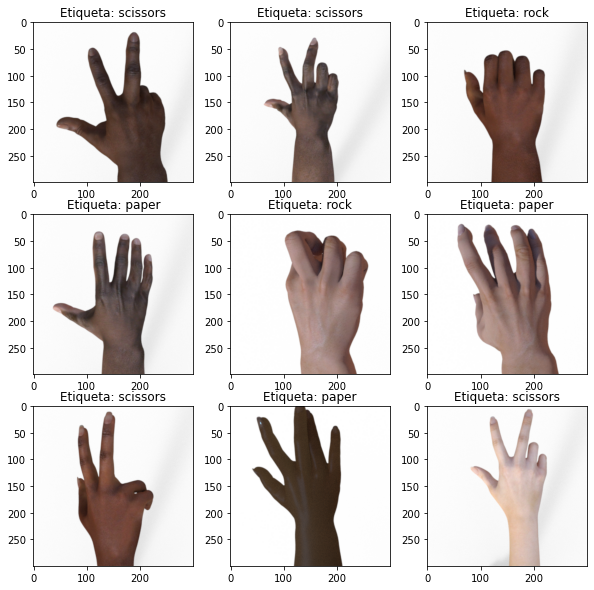

In [18]:
plt.figure(figsize=(10, 10))
indice = 0
ejemplos = entrenamiento_raw.take(9)
for e in ejemplos:
    imagenn, etiqueta = e
    indice += 1
    plt.subplot(3,3, indice)
    plt.title("Etiqueta: " + obtener_etiqueta(etiqueta.numpy()))
    plt.imshow(imagenn.numpy())

### Pre-procesamiento
Ahora que sabemos como son estas imágenes, vamos a optimizar estos datos para la red neuronal.

In [19]:
def aplicar_formato(imagen, etiqueta):
    # Hago que el color sea un número entre 0 y 1.
    imagen = tf.cast(imagen, tf.float32) / 255
    # Cambio su tamaño a uno más pequeño
    imagen = tf.image.resize(imagen, [150, 150])
    return imagen, etiqueta

In [20]:
entrenamiento = entrenamiento_raw.map(aplicar_formato)
prueba = prueba_raw.map(aplicar_formato)

Con el formato unificado, vamos a aplicar distintos cambios aleatorios a las imágenes para prevenir el overfitting, osea evitar "sobreajustar" el modelo.

In [21]:
# Funciones para cambiar aleatoriamente ciertos aspectos
def rotar(imagen: tf.Tensor) -> tf.Tensor:
    imagen = tf.image.random_flip_left_right(imagen)
    imagen = tf.image.random_flip_up_down(imagen)
    return imagen

def cambiar_color(imagen: tf.Tensor) -> tf.Tensor:
    imagen = tf.image.random_hue(imagen, max_delta=0.08)
    imagen = tf.image.random_saturation(imagen, lower=0.7, upper=1.3)
    imagen = tf.image.random_brightness(imagen, 0.05)
    imagen = tf.image.random_contrast(imagen, lower=0.8, upper=1)
    imagen = tf.clip_by_value(imagen, clip_value_min=0, clip_value_max=1)
    return imagen

def rotar2(imagen: tf.Tensor) -> tf.Tensor:
    # Rotate 0, 90, 180, 270 degrees
    return tf.image.rot90(
        imagen,
        tf.random.uniform(shape=[], minval=0, maxval=4, dtype=tf.int32)
    )

def invertir(imagen: tf.Tensor) -> tf.Tensor:
    random = tf.random.uniform(shape=[], minval=0, maxval=1)
    if random > 0.5:
        imagen = tf.math.multiply(imagen, -1)
        imagen = tf.math.add(imagen, 1)
    return imagen

def ampliar(imagen: tf.Tensor, min_zoom=0.8, max_zoom=1.0) -> tf.Tensor:
    imagen_width, imagen_height, imagen_colors = imagen.shape
    crop_size = (imagen_width, imagen_height)

    # Generate crop settings, ranging from a 1% to 20% crop.
    scales = list(np.arange(min_zoom, max_zoom, 0.01))
    boxes = np.zeros((len(scales), 4))

    for i, scale in enumerate(scales):
        x1 = y1 = 0.5 - (0.5 * scale)
        x2 = y2 = 0.5 + (0.5 * scale)
        boxes[i] = [x1, y1, x2, y2]

    def cortar_aleatoriamente(img):
        # Create different crops for an imagen
        crops = tf.image.crop_and_resize(
            [img],
            boxes=boxes,
            box_indices=np.zeros(len(scales)),
            crop_size=crop_size
        )
        # Return a random crop
        return crops[tf.random.uniform(shape=[], minval=0, maxval=len(scales), dtype=tf.int32)]

    choice = tf.random.uniform(shape=[], minval=0., maxval=1., dtype=tf.float32)

    # Only apply cropping 50% of the time
    return tf.cond(choice < 0.5, lambda: imagen, lambda: cortar_aleatoriamente(imagen))

def mejorar_datos(imagen, label):
    imagen = rotar(imagen)
    imagen = cambiar_color(imagen)
    imagen = rotar2(imagen)
    imagen = ampliar(imagen)
    imagen = invertir(imagen)
    return imagen, label

In [22]:
entrenamiento_augmented = entrenamiento.map(mejorar_datos).map(mejorar_datos)

Volvemos a mostrar las imágenes de entrenamiento. 
No mostramos las de prueba porque quedan sin cambios.



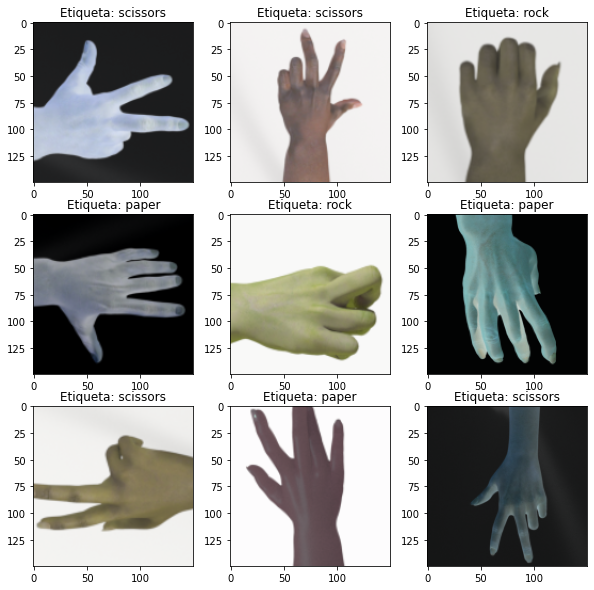

In [23]:
plt.figure(figsize=(10, 10))
indice = 0
ejemplos = entrenamiento_augmented.take(9)
for e in ejemplos:
    imagen, etiqueta = e
    indice += 1
    plt.subplot(3,3, indice)
    plt.title("Etiqueta: " + obtener_etiqueta(etiqueta.numpy()))
    plt.imshow(imagen.numpy())

Desordenamos los datos, para que la red no aprenda del orden de las imágenes.

In [24]:
TAMANIO_BATCH = 32
entrenamiento_desordenado = entrenamiento_augmented\
    .shuffle(buffer_size=TAMAÑO_DATOS_ENTRENAMIENTO)\
    .batch(TAMANIO_BATCH)\
    .prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

prueba_desordenado = prueba.batch(TAMANIO_BATCH)

### Creamos el modelo y lo entrenamos

Para el modelo utilizaremos un conjunto de capas de los siguientes tipos:  

* **Convoluciones**: recorre de a un subconjunto de píxeles de la imagen aplicando, multiplicandolos por una matriz que será un filtro.  
La idea es quedarse con determinadas características clave de la imagen en cuestión.  
* **MaxPooling**: reduce la información obtenida luego de una convolución. Es decir de un conjunto de valores, se queda con el mayor. También se podría usar AvgPooling que toma el valor promedio.  
* **Flatten**: Reordena las neuronas para que sean un array de una única dimensión.  
* **Dense o fully_connected**: Son capas donde las neuronas se encuentran totalmente conectadas unas con otras. En estas se usa una función de activación segun el uso que se le de:  
  * ReLU: permite obtener solamente los valores cuando superan algún otro en particular.  
  * SoftMax: convierte a una probabilidad.  



In [25]:
model = tf.keras.models.Sequential()

pooling = tf.keras.layers.MaxPooling2D(
    pool_size=(2, 2),
    strides=(2, 2)
)

model.add(tf.keras.layers.Convolution2D(
    input_shape=(150, 150, 3),
    filters=64,
    kernel_size=3,
    activation=tf.keras.activations.relu
))
model.add(pooling)

model.add(tf.keras.layers.Convolution2D(
    filters=64,
    kernel_size=3,
    activation=tf.keras.activations.relu
))
model.add(pooling)

model.add(tf.keras.layers.Convolution2D(
    filters=128,
    kernel_size=3,
    activation=tf.keras.activations.relu
))
model.add(pooling)

model.add(tf.keras.layers.Convolution2D(
    filters=128,
    kernel_size=3,
    activation=tf.keras.activations.relu
))
model.add(pooling)

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(
    units=512,
    activation=tf.keras.activations.relu
))
model.add(tf.keras.layers.Dense(
    units=3,
    activation=tf.keras.activations.softmax
))

Guardamos una representación del modelo en la imagen "graph.png"

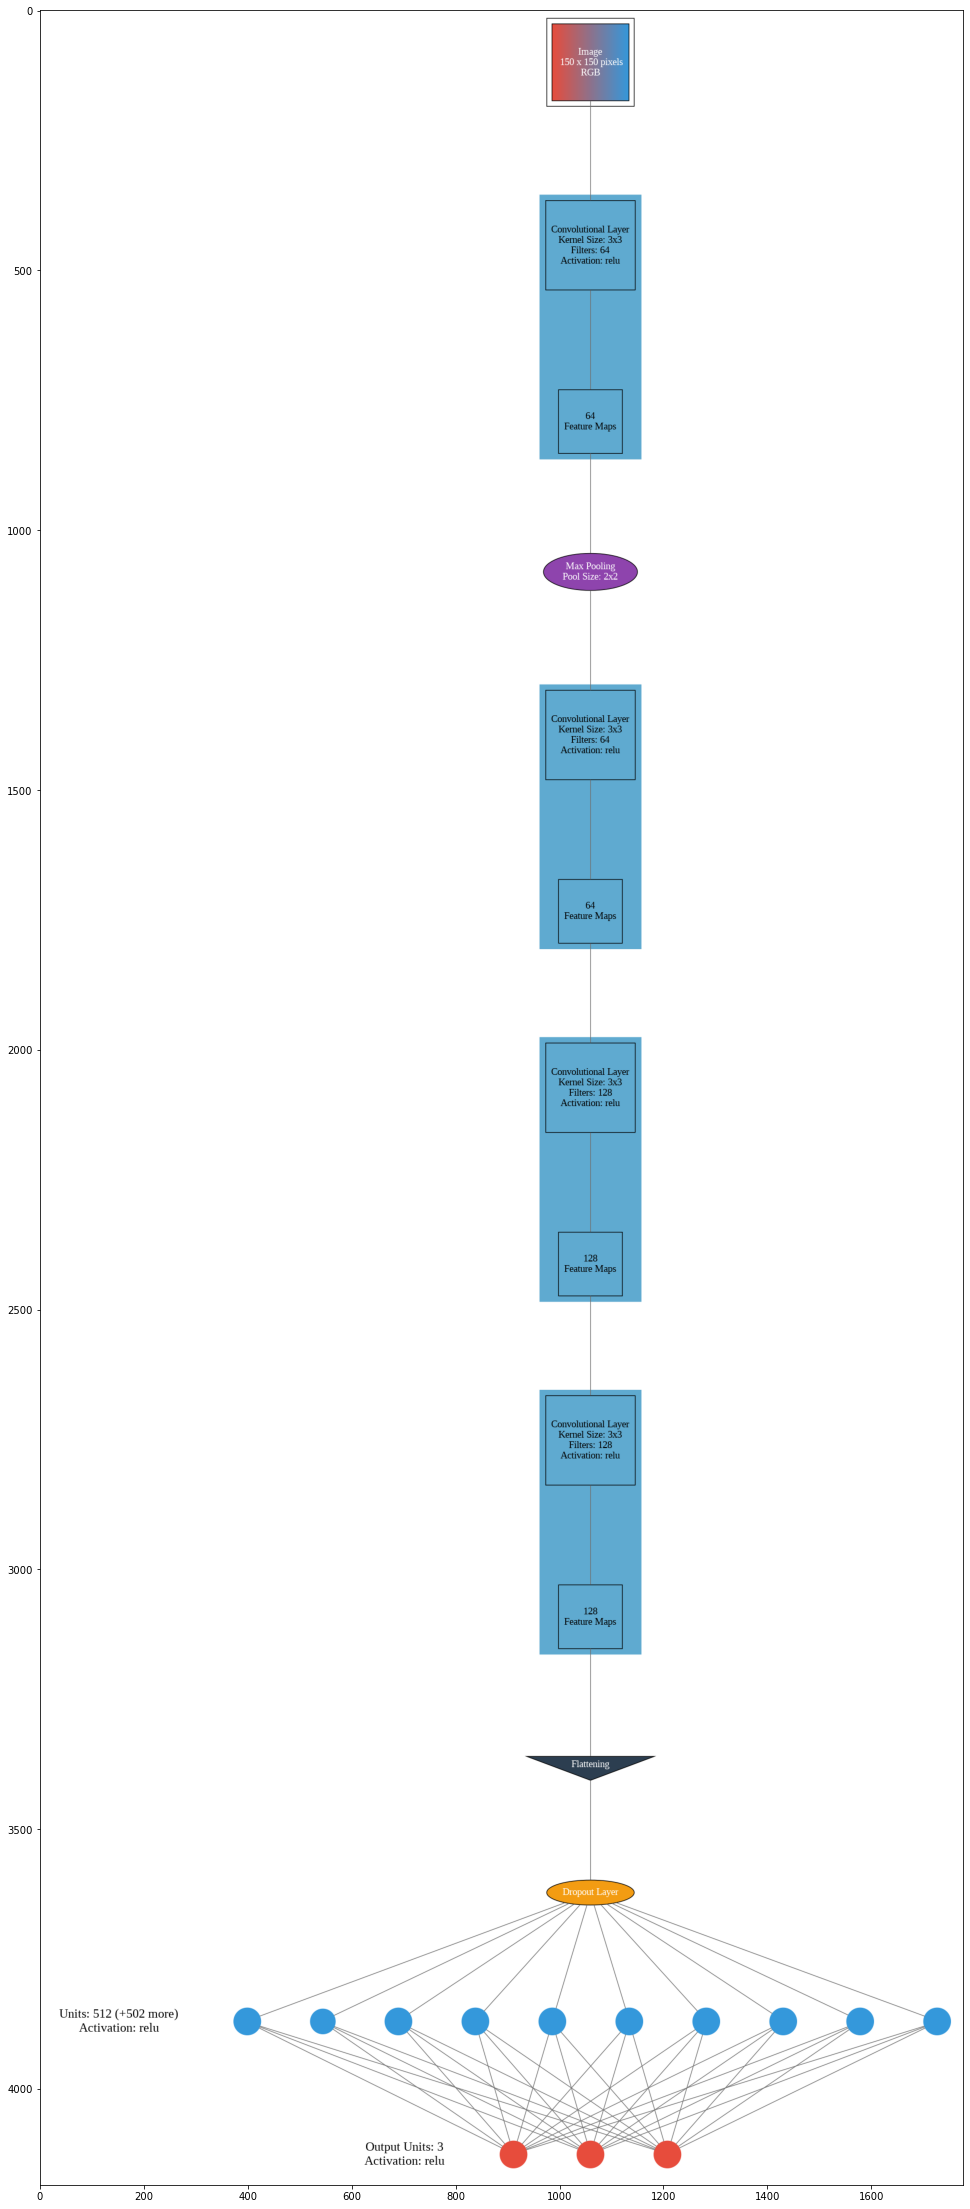

In [26]:
MOSTRAR_MODELO = True

visualizer(model, format='png', view=False)
image = plt.imread("graph.png")
plt.figure(figsize=(30,40))
if MOSTRAR_MODELO: plt.imshow(image)

Compilamos y entrenamos el modelo

In [27]:
rmsprop_optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001)

model.compile(
    optimizer=rmsprop_optimizer,
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    metrics=['accuracy']
)

steps_per_epoch = TAMAÑO_DATOS_ENTRENAMIENTO // TAMANIO_BATCH
validation_steps = TAMAÑO_DATOS_PRUEBA // TAMANIO_BATCH
epochs = 15

model.fit(
    x=entrenamiento_desordenado.repeat(),
    validation_data=prueba_desordenado.repeat(),
    epochs=epochs,
    steps_per_epoch=steps_per_epoch,
    validation_steps=validation_steps,
    verbose=1
)

Epoch 1/15


2021-12-14 20:31:57.373108: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 867 of 2520
2021-12-14 20:32:07.379636: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 1779 of 2520
2021-12-14 20:32:15.570491: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:228] Shuffle buffer filled.


78/78 [==============================] - 61s 412ms/step - loss: 1.1108 - accuracy: 0.4183 - val_loss: 1.1896 - val_accuracy: 0.4176
Epoch 2/15
 1/78 [..............................] - ETA: 22s - loss: 1.0480 - accuracy: 0.4167

2021-12-14 20:32:58.039996: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 876 of 2520
2021-12-14 20:33:08.037061: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 1701 of 2520
2021-12-14 20:33:18.015593: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:228] Shuffle buffer filled.


78/78 [==============================] - 60s 778ms/step - loss: 0.6696 - accuracy: 0.7255 - val_loss: 0.6648 - val_accuracy: 0.7102
Epoch 3/15
 2/78 [..............................] - ETA: 22s - loss: 0.3751 - accuracy: 0.8393

2021-12-14 20:33:58.595777: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 846 of 2520
2021-12-14 20:34:08.608867: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 1615 of 2520
2021-12-14 20:34:18.585758: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 2406 of 2520
2021-12-14 20:34:20.019518: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:228] Shuffle buffer filled.


78/78 [==============================] - 62s 794ms/step - loss: 0.4262 - accuracy: 0.8376 - val_loss: 0.4932 - val_accuracy: 0.7955
Epoch 4/15
 3/78 [>.............................] - ETA: 24s - loss: 0.3111 - accuracy: 0.8864

2021-12-14 20:35:00.487559: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 809 of 2520
2021-12-14 20:35:10.486687: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 1617 of 2520
2021-12-14 20:35:20.492076: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 2422 of 2520
2021-12-14 20:35:21.614784: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:228] Shuffle buffer filled.


78/78 [==============================] - 61s 789ms/step - loss: 0.2991 - accuracy: 0.8895 - val_loss: 0.5401 - val_accuracy: 0.7756
Epoch 5/15
 4/78 [>.............................] - ETA: 25s - loss: 0.1129 - accuracy: 0.9750

2021-12-14 20:36:02.004683: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 816 of 2520
2021-12-14 20:36:12.023494: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 1630 of 2520
2021-12-14 20:36:22.013826: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 2441 of 2520
2021-12-14 20:36:22.905110: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:228] Shuffle buffer filled.


78/78 [==============================] - 61s 786ms/step - loss: 0.2276 - accuracy: 0.9204 - val_loss: 0.3160 - val_accuracy: 0.8409
Epoch 6/15
 5/78 [>.............................] - ETA: 25s - loss: 0.1652 - accuracy: 0.9539

2021-12-14 20:37:03.297602: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 837 of 2520
2021-12-14 20:37:13.288546: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 1665 of 2520
2021-12-14 20:37:23.263130: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:228] Shuffle buffer filled.


78/78 [==============================] - 60s 776ms/step - loss: 0.1768 - accuracy: 0.9409 - val_loss: 0.2333 - val_accuracy: 0.8977
Epoch 7/15
 6/78 [=>............................] - ETA: 25s - loss: 0.1228 - accuracy: 0.9457

2021-12-14 20:38:03.777759: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 793 of 2520
2021-12-14 20:38:13.783249: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 1612 of 2520
2021-12-14 20:38:23.778810: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 2443 of 2520
2021-12-14 20:38:24.739875: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:228] Shuffle buffer filled.


78/78 [==============================] - 61s 786ms/step - loss: 0.1629 - accuracy: 0.9486 - val_loss: 0.1700 - val_accuracy: 0.9574
Epoch 8/15
 7/78 [=>............................] - ETA: 26s - loss: 0.1114 - accuracy: 0.9630

2021-12-14 20:39:05.038488: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 822 of 2520
2021-12-14 20:39:15.054754: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 1632 of 2520
2021-12-14 20:39:25.041894: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 2430 of 2520
2021-12-14 20:39:26.085818: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:228] Shuffle buffer filled.


78/78 [==============================] - 61s 788ms/step - loss: 0.1195 - accuracy: 0.9586 - val_loss: 0.3006 - val_accuracy: 0.8949
Epoch 9/15
 8/78 [==>...........................] - ETA: 25s - loss: 0.1284 - accuracy: 0.9677

2021-12-14 20:40:06.437656: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 834 of 2520
2021-12-14 20:40:16.439553: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 1625 of 2520
2021-12-14 20:40:26.440334: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 2431 of 2520
2021-12-14 20:40:27.513831: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:228] Shuffle buffer filled.


78/78 [==============================] - 61s 787ms/step - loss: 0.1150 - accuracy: 0.9642 - val_loss: 0.3115 - val_accuracy: 0.8864
Epoch 10/15
 9/78 [==>...........................] - ETA: 25s - loss: 0.1861 - accuracy: 0.9536

2021-12-14 20:41:07.770737: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 860 of 2520
2021-12-14 20:41:17.761949: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 1679 of 2520
2021-12-14 20:41:27.761462: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 2485 of 2520
2021-12-14 20:41:28.269792: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:228] Shuffle buffer filled.


78/78 [==============================] - 60s 780ms/step - loss: 0.1156 - accuracy: 0.9695 - val_loss: 0.6414 - val_accuracy: 0.8153
Epoch 11/15
10/78 [==>...........................] - ETA: 24s - loss: 0.1547 - accuracy: 0.9423

2021-12-14 20:42:08.576932: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 798 of 2520
2021-12-14 20:42:18.578331: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 1644 of 2520
2021-12-14 20:42:28.586349: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 2462 of 2520
2021-12-14 20:42:29.343789: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:228] Shuffle buffer filled.


78/78 [==============================] - 61s 784ms/step - loss: 0.1037 - accuracy: 0.9691 - val_loss: 0.8268 - val_accuracy: 0.7784
Epoch 12/15
11/78 [===>..........................] - ETA: 24s - loss: 0.1356 - accuracy: 0.9593

2021-12-14 20:43:09.691353: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 812 of 2520
2021-12-14 20:43:19.687152: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 1634 of 2520
2021-12-14 20:43:29.688080: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 2457 of 2520
2021-12-14 20:43:30.442920: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:228] Shuffle buffer filled.


78/78 [==============================] - 61s 783ms/step - loss: 0.0880 - accuracy: 0.9691 - val_loss: 0.3606 - val_accuracy: 0.8722
Epoch 13/15
12/78 [===>..........................] - ETA: 24s - loss: 0.0554 - accuracy: 0.9814

2021-12-14 20:44:10.709403: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 839 of 2520
2021-12-14 20:44:20.715921: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 1639 of 2520
2021-12-14 20:44:30.718181: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 2461 of 2520
2021-12-14 20:44:31.549981: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:228] Shuffle buffer filled.


78/78 [==============================] - 61s 793ms/step - loss: 0.0772 - accuracy: 0.9783 - val_loss: 1.2444 - val_accuracy: 0.7528
Epoch 14/15
13/78 [====>.........................] - ETA: 25s - loss: 0.0541 - accuracy: 0.9828

2021-12-14 20:45:12.765608: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 940 of 2520
2021-12-14 20:45:22.774886: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 1845 of 2520
2021-12-14 20:45:30.351936: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:228] Shuffle buffer filled.


78/78 [==============================] - 61s 783ms/step - loss: 0.0776 - accuracy: 0.9723 - val_loss: 0.1650 - val_accuracy: 0.9574
Epoch 15/15
14/78 [====>.........................] - ETA: 26s - loss: 0.0232 - accuracy: 0.9909

2021-12-14 20:46:14.153760: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 930 of 2520
2021-12-14 20:46:24.157535: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 1843 of 2520
2021-12-14 20:46:31.528196: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:228] Shuffle buffer filled.


78/78 [==============================] - 61s 786ms/step - loss: 0.0739 - accuracy: 0.9755 - val_loss: 0.3092 - val_accuracy: 0.9176


In [28]:
print(entrenamiento_desordenado)
print(prueba_desordenado)

<PrefetchDataset shapes: ((None, 150, 150, 3), (None,)), types: (tf.float32, tf.int64)>
<BatchDataset shapes: ((None, 150, 150, 3), (None,)), types: (tf.float32, tf.int64)>


In [29]:
nombre_salida = 'piedra_papel_o_tijera.h5'
model.save(nombre_salida, save_format='h5')

Verificamos la presición del modelo evaluando en el set de datos de prueba y el de entrenamiento

In [30]:
_, precision_entrenamiento = model.evaluate(
    x=entrenamiento.batch(TAMANIO_BATCH).take(TAMAÑO_DATOS_ENTRENAMIENTO )
)

_, precision_prueba = model.evaluate(
    x=prueba.batch(TAMANIO_BATCH).take(TAMAÑO_DATOS_PRUEBA)
)
print('\n')
print('Presición en los datos de entrenamiento: ', precision_entrenamiento)
print('Presición en los datos de prueba: ', precision_prueba)

12/12 [==============================] - 1s 81ms/step - loss: 0.3155 - accuracy: 0.9167


Presición en los datos de entrenamiento:  0.9944444298744202
Presición en los datos de prueba:  0.9166666865348816


### Verificación
Ahora vamos a verificar el funcionamiento con imágenes nuevas distintas a las utilizadas en el set de datos de entrenamiento o prueba.
Dejamos el link a las imágenes usadas. Las imágenes representan movimientos de nuestras manos realizando las distintas jugadas, para tratar que el modelo las diferencie.

https://ibb.co/VjWgjT8

https://ibb.co/d4mHCcn

https://ibb.co/GtRWYJq

Una vez descargadas, se deben subir al collab y actualizar las rutas en la celda siguiente o, si se corre local, guardarlas en la carpeta ejemplos en el mismo directorio que el notebook. 


In [31]:
imagenes = []
rutas = ['ejemplos/papel.jpeg', 'ejemplos/piedra.jpeg','ejemplos/tijera.jpeg']
respuestas = ['paper', 'rock', 'scissors']
for ruta in rutas:
    imagen = plt.imread(ruta,0)
    formateada =aplicar_formato(imagen, ".")[0]
    imagenes.append(formateada)

X = np.array(imagenes).astype('float32')

In [32]:
predicciones = model.predict(X)
for i in range(len(predicciones)): 
    prediccion = list(predicciones[i])
    elegido = obtener_etiqueta(prediccion.index(max(prediccion)))
    if elegido == respuestas[i]:
        print(f"La predicción [{elegido}] para la imagen {rutas[i]}, fue correcta!")
    else:
        print(f"La predicción [{elegido}] para la imagen {rutas[i]}, fue incorrecta. Esperado {respuestas[i]}")

La predicción [rock] para la imagen ejemplos/papel.jpeg, fue incorrecta. Esperado paper
La predicción [rock] para la imagen ejemplos/piedra.jpeg, fue correcta!
La predicción [scissors] para la imagen ejemplos/tijera.jpeg, fue correcta!


Y con esto logramos que este segundo modelo generace jugadas a partir de imágenes para jugar contra el primero. Si bien puede verse que las respuestas no son perfectas, en un futuro con unos sets mas amplios podrán mejorarse.

## Unificación
Con estos dos modelos podemos simular una partida de "piedra, papel o tijeras" partiendo de una imagen que se juega contra una inteligencia artificial

In [33]:
# Obtenemos predicción de la imagen

imagen = plt.imread(ruta,0)
formateada =aplicar_formato(imagen, ".")[0]
X = np.array([formateada]).astype('float32')



In [34]:
def etiqueta_a_español(etiqueta):
    traducciones = {
        "paper":"papel",
        "rock":"piedra",
        "scissors":"tijeras"
    }
    return traducciones[etiqueta]

def jugar_contra_int_artificial(modelo_identificador_imagen, modelo_jugador, ruta_imagen):
    print("Cargando imagen de elección del jugador desde la ruta", ruta_imagen)
    imagen = plt.imread(ruta,0)
    formateada =aplicar_formato(imagen, ".")[0]
    X = np.array([formateada]).astype('float32')
    prediccion = list(modelo_identificador_imagen.predict(X)[0])
    etiqueta_ingles = obtener_etiqueta(prediccion.index(max(prediccion)))
    
    etiqueta = etiqueta_a_español("paper")
    print("Elección identificada desde la imagen -->", etiqueta)
    prediccion = modelo_jugador.predict([string_to_nn(etiqueta)])
    eleccion_red = opcion_red_neuronal(prediccion[0])
    
    ganador = definir_ganador(etiqueta, eleccion_red)
    if ganador == 2:
        print("Perdiste!, la red eligió ", eleccion_red)
    else:
        print("Ganaste!, la red eligió:", eleccion_red)

In [35]:
ruta = "ejemplos/papel.jpeg"
jugar_contra_int_artificial(model, modelo_entrenado, ruta)



Cargando imagen de elección del jugador desde la ruta ejemplos/papel.jpeg
Elección identificada desde la imagen --> papel
Perdiste!, la red eligió  tijera
